<a href="https://colab.research.google.com/github/babymlin/Cifar10_80_percent/blob/main/Cifar10_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-addons
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

     |████████████████████████████████| 686kB 6.9MB/s 


In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [27]:
class_names = [
  "airplane",										
  "automobile",										
  "bird",										
  "cat",										
  "deer",										
  "dog",										
  "frog",										
  "horse",										
  "ship",										
  "truck"
]

In [28]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Softmax, MaxPooling2D, Flatten, BatchNormalization, ReLU, GlobalAveragePooling2D, Dropout
layers1 = [
  Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=input_shape),
  MaxPooling2D(),
  Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"),
  MaxPooling2D(),
  Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"),
  MaxPooling2D(),
  GlobalAveragePooling2D(),
  Dense(units=10),
  Softmax()
] 
layers = [
  Conv2D(filters=128, kernel_size=3, strides=1, padding="same", input_shape=input_shape),
  BatchNormalization(),
  ReLU(),
  Conv2D(filters=128, kernel_size=4, strides=2, padding="same"),
  BatchNormalization(),
  ReLU(),
  Conv2D(filters=256, kernel_size=3, strides=1, padding="same"),
  BatchNormalization(),
  ReLU(),
  Conv2D(filters=256, kernel_size=4, strides=2, padding="same"),
  BatchNormalization(),
  ReLU(),
  Conv2D(filters=512, kernel_size=3, strides=1, padding="same"),
  BatchNormalization(),
  ReLU(),
  Conv2D(filters=512, kernel_size=4, strides=2, padding="same"),
  BatchNormalization(),
  ReLU(),
  GlobalAveragePooling2D(),
  Dense(units=128, activation="relu"),
  Dropout(0.25),
  Dense(units=10),
  Softmax()
] 
model = Sequential(layers1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)              

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
callbacks = [
  EarlyStopping(monitor="val_loss",
        restore_best_weights=True,
        patience=5,
        ),
  ModelCheckpoint("Cifar10v2-BestModel.h5", monitor="val_loss", save_best_only=True),
  CSVLogger("Cifar10v2.csv")
]

In [30]:
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam)
model.compile(optimizer=ranger, loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

In [31]:
batch_size = 64
epochs = 100
model.fit(X_train_norm,
    y_train,
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1, 
    callbacks=callbacks,
    verbose=2
)

Epoch 1/100
704/704 - 8s - loss: 1.9273 - accuracy: 0.2842 - val_loss: 1.6714 - val_accuracy: 0.3890
Epoch 2/100
704/704 - 6s - loss: 1.6180 - accuracy: 0.4098 - val_loss: 1.5263 - val_accuracy: 0.4472
Epoch 3/100
704/704 - 6s - loss: 1.4691 - accuracy: 0.4734 - val_loss: 1.3966 - val_accuracy: 0.5002
Epoch 4/100
704/704 - 6s - loss: 1.3554 - accuracy: 0.5152 - val_loss: 1.3186 - val_accuracy: 0.5300
Epoch 5/100
704/704 - 6s - loss: 1.2680 - accuracy: 0.5498 - val_loss: 1.2670 - val_accuracy: 0.5558
Epoch 6/100
704/704 - 6s - loss: 1.1918 - accuracy: 0.5803 - val_loss: 1.1319 - val_accuracy: 0.6078
Epoch 7/100
704/704 - 6s - loss: 1.1310 - accuracy: 0.6027 - val_loss: 1.2149 - val_accuracy: 0.5642
Epoch 8/100
704/704 - 6s - loss: 1.0753 - accuracy: 0.6244 - val_loss: 1.1553 - val_accuracy: 0.5858
Epoch 9/100
704/704 - 6s - loss: 1.0248 - accuracy: 0.6418 - val_loss: 1.0170 - val_accuracy: 0.6490
Epoch 10/100
704/704 - 6s - loss: 0.9744 - accuracy: 0.6587 - val_loss: 1.0895 - val_accura

In [32]:
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6703 - accuracy: 0.7742


[0.6702687740325928, 0.7742000222206116]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


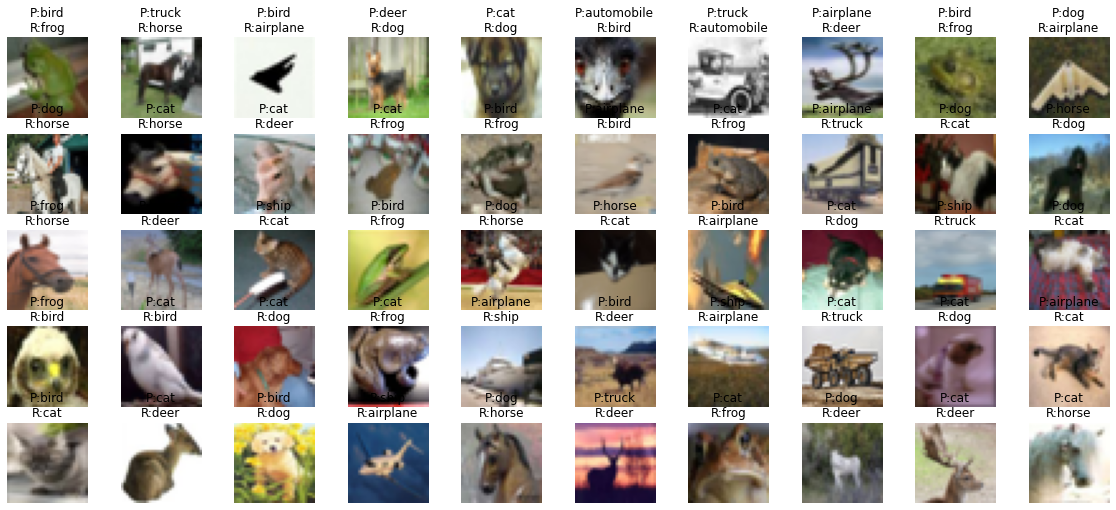

In [40]:
pre = model.predict_classes(X_test_norm)
import numpy as np
wrong_list = np.nonzero(pre != y_test.reshape(10000))[0] #預測錯誤列表
right_lable = y_test[wrong_list] #預測錯誤圖片的正確標籤
pre_lable = pre[wrong_list] #預測錯誤圖片的預測標籤
wrong_img = X_test[wrong_list] #錯誤圖片

plt.figure(figsize=(20, 400))
width = 10
height = int(len(wrong_img)/10) + 1
for i, img in enumerate(wrong_img[:50]):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  title = f"P:{class_names[pre_lable[i]]}\nR:{class_names[right_lable[i][0]]}"
  plt.title(title)
  plt.imshow(img)

請輸入網址：https://images.chinatimes.com/newsphoto/2019-03-24/656/20190324002225.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.999
automobile 的機率: 0.0
bird 的機率: 0.0
cat 的機率: 0.0
deer 的機率: 0.0
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


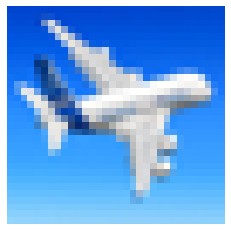

In [53]:
import requests
from PIL import Image
import numpy as np
url = input("請輸入網址：")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_norm = np.expand_dims(img_np/255.0, axis=0)
pre = model.predict(img_norm)[0]
for n, p in zip(class_names, pre):
    print(n, "的機率:", round(p, 3))
plt.axis("off")
plt.imshow(img)